In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [26]:
# Get the data and dissolve it
countries = gpd.read_file("Countries/ne_50m_admin_0_countries.shp")
countries = countries[countries["SOVEREIGNT"] == "United States of America"]
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
11,Admin-0 country,3,6,United States of America,US1,1,2,Dependency,1,Northern Mariana Islands,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((145.70840 18.76250, 145.67813 ..."
12,Admin-0 country,3,6,United States of America,US1,1,2,Dependency,1,United States Virgin Islands,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-64.84502 18.33008, -64.91997 ..."
13,Admin-0 country,3,6,United States of America,US1,1,2,Dependency,1,Guam,...,None,None,None,None,None,None,None,None,None,"POLYGON ((144.74180 13.25928, 144.69951 13.257..."
14,Admin-0 country,3,4,United States of America,US1,1,2,Dependency,1,American Samoa,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-170.72627 -14.35117, -170.76924 -14..."
15,Admin-0 country,1,5,United States of America,US1,1,2,Dependency,1,Puerto Rico,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-66.12939 18.44492, -66.09849 ..."
16,Admin-0 country,5,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."


In [12]:
buffer = gpd.read_file("../interim_results/harbor_50km_coast_2km_buffer.geojson")
buffer

,geometry
0,"MULTIPOLYGON (((-163.81277 -82.84907, -163.813..."


In [27]:
eez = gpd.read_file("EEZ/eez_boundaries_v11.shp")
eez = eez[eez["SOVEREIGN1"] == "United States"]
#eez.to_file("only_us_eez.shp")
eez

,LINE_ID,LINE_NAME,LINE_TYPE,MRGID_SOV1,MRGID_TER1,TERRITORY1,SOVEREIGN1,MRGID_TER2,TERRITORY2,MRGID_SOV2,...,SOURCE2,URL2,SOURCE3,URL3,ORIGIN,DOC_DATE,MRGID_JREG,JOINT_REG,LENGTH_KM,geometry
117,1297.0,American Samoa (United States) - Cook Islands ...,Treaty,2204.0,8670.0,American Samoa,United States,8672.0,Cook Islands,2227.0,...,Treaty between the United States of America an...,http://www.marineregions.org/documents/USA-COK...,None,None,Database,1980-06-11,0.0,None,1036.0,"LINESTRING (-166.64306 -17.55778, -166.02750 -..."
157,1345.0,American Samoa (United States) - Tokelau (New ...,Treaty,2204.0,8670.0,American Samoa,United States,8675.0,Tokelau,2227.0,...,None,None,None,None,Database,1980-12-02,0.0,None,590.0,"LINESTRING (-168.51667 -10.02389, -169.78056 -..."
158,1346.0,American Samoa (United States) - Niue (New Zea...,Treaty,2204.0,8670.0,American Samoa,United States,8673.0,Niue,2227.0,...,None,None,None,None,Database,1997-05-13,0.0,None,517.0,"LINESTRING (-166.64194 -17.55500, -166.66056 -..."
171,1369.0,Puerto Rico (United States) - Venezuela,Treaty,2204.0,8641.0,Puerto Rico,United States,2201.0,Venezuela,2201.0,...,Maritime Boundary: Venezuela - USA,http://www.marineregions.org/documents/ls91.jpg,None,None,Database,1978-03-28,0.0,None,311.0,"LINESTRING (-65.98140 15.65491, -66.11917 15.5..."
221,1886.0,Guam (United States) - Micronesia,Treaty,2204.0,8599.0,Guam,United States,8595.0,Micronesia,8595.0,...,None,None,None,None,Database,2014-08-01,0.0,None,828.0,"LINESTRING (141.21875 13.09764, 141.34719 12.9..."
253,1924.0,Howland and Baker islands (United States) - Ph...,Treaty,2204.0,48684.0,Howland and Baker islands,United States,8658.0,Phoenix Group,2116.0,...,None,None,None,None,Database,2014-11-04,0.0,None,613.0,"LINESTRING (-177.45297 -3.01483, -177.28460 -2..."
256,1927.0,Jarvis Island (United States) - Line Group (Ki...,Treaty,2204.0,8668.0,Jarvis Island,United States,8657.0,Line Group,2116.0,...,None,None,None,None,Database,2014-11-04,0.0,None,1014.0,"LINESTRING (-158.30397 -3.27175, -158.18572 -3..."
257,1929.0,Palmyra Atoll (United States) - Line Group (Ki...,Treaty,2204.0,8669.0,Palmyra Atoll,United States,8657.0,Line Group,2116.0,...,None,None,None,None,Database,2014-11-04,0.0,None,710.0,"LINESTRING (-163.06472 2.65967, -162.18732 3.9..."
285,2067.0,United States Virgin Islands (United States) -...,Treaty,2204.0,8642.0,United States Virgin Islands,United States,2201.0,Venezuela,2201.0,...,Maritime Boundary: Venezuela - USA,http://www.marineregions.org/documents/ls91.jpg,None,None,Database,1978-03-28,0.0,None,243.0,"LINESTRING (-64.01889 16.74694, -64.10861 16.7..."
336,3649.0,Jarvis Island (United States) 200 NM,200 NM,2204.0,8668.0,Jarvis Island,United States,0.0,None,0.0,...,None,None,None,None,Buffer,2017-03-28,0.0,None,1069.0,"LINESTRING (-158.31855 -3.28679, -158.31924 -3..."


In [21]:
buffer_us = buffer.intersection(eez)
buffer_us

0    MULTILINESTRING ((-65.25800 18.65579, -65.2562...
dtype: geometry

<AxesSubplot:>

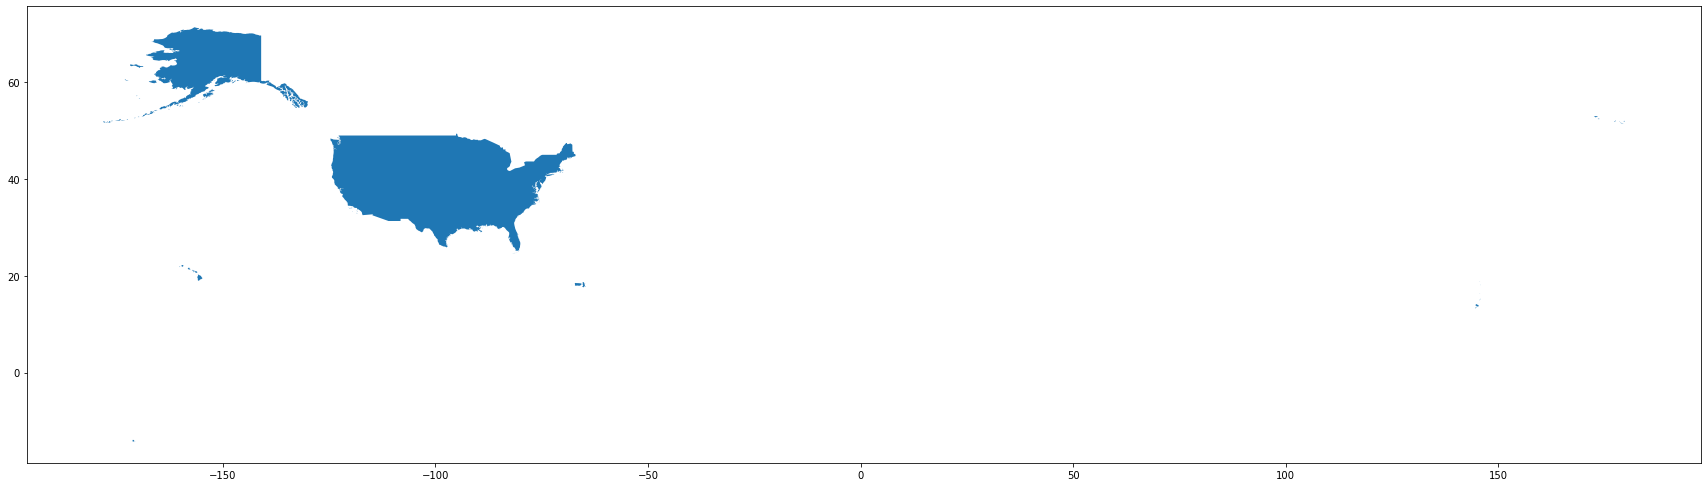

In [23]:
ax = buffer_us.plot(figsize=(30,30))
countries.plot(ax=ax)